<a href="https://colab.research.google.com/github/alsrba2428-cyber/pdecode/blob/main/experiment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Experiment 3: The Second-Order 1D Wave Equation**

 This experiment moves from first-order to second-order hyperbolic PDEs by tackling the classic one-dimensional wave equation. This equation models a vast range of physical phenomena, including the vibrations of a guitar string, pressure waves in a tube, and the propagation of electromagnetic waves in a transmission line.

  **Aim**

To solve the one-dimensional wave equation using the finite difference method with an explicit time-stepping scheme.


**3.5.2 Objectives**

To solve the second-order wave equation for a 1D domain with given initial and boundary conditions.
To implement the central difference scheme for both time and space derivatives.
To understand the role of initial displacement and initial velocity.
To simulate wave propagation and reflection and observe how waves evolve over time.


**3.5.3 Governing Equation and Discretization**

The second-order, one-dimensional wave equation is given by:  
$$\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2}$$
where u(x,t) is the displacement at position x and time t, and c is the constant wave propagation speed.

To solve this numerically, we use a central difference approximation for both derivatives:

- *Time Derivative:*
 $\frac{\partial^2 u}{\partial t^2} \approx \frac{u_i^{n+1} - 2u_i^n + u_i^{n-1}}{(\Delta t)^2}$



- *Space Derivative:* $\frac{\partial^2 u}{\partial x^2} \approx \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{(\Delta x)^2}$


Substituting these into the governing equation and solving for the future displacement
 gives the explicit update formula.

 Substituting these into the governing equation and solving for the future displacement $u_i^{n+1} $
 gives the explicit update formula.


**5.4 Algorithm**

**1.Discretize the Domain:**
- Divide the spatial domain of length L into discrete points using a step size
$\Delta x$
- Divide the time domain of total duration T using a time step
$\Delta t$

**2.Stability Check (CFL Condition):**
Calculate the ** Courant Number,** $C = \frac{c \Delta t}{\Delta x}$

.
For this explicit scheme to be stable, the Courant number must satisfy
. If
, the numerical solution will grow without bound and become meaningless.

**3. Set Initial Conditions:**

This is a second-order equation in time, so we need two initial conditions:
Initial displacement:
Initial velocity:

**4.Set Boundary Conditions:**

Assume the boundaries of the domain are fixed (e.g., the ends of a guitar string). This is a **Dirichlet boundary condition:**$u(0, t) = u(L, t) = 0$
 for all time t.

**5.Time-stepping Loop:**

- The update rule requires information from two previous time steps (n and n-1). This poses a problem for the very first step (n=1), as we don’t have a state at n=-1. We use a special formula for the first step derived from the initial velocity condition. For zero initial velocity, this simplifies.
- For all subsequent time steps (n > 1), use the main finite difference formula: $$u_i^{n+1} = 2u_i^n - u_i^{n-1} + C^2 \left( u_{i+1}^n - 2u_i^n + u_{i-1}^n \right)$$

**Plot and Visualize:**
After solving for all time steps, plot the wave’s displacement u(x) at different time instances to observe its motion and reflection.
3.5.5 Application Problem and Python Implementation
Problem: The vibration of a stretched string under tension is governed by the 1D wave equation. We are tasked with modeling the vibration of a string of length L=1.0m stretched between two fixed points. The string is given an initial displacement in the shape of a sine wave,
, but zero initial velocity.

Courant Number C = 0.50
CFL condition is satisfied.
x	u^0	u^1	u^2	u^3	u^4
0.00	0.0000	0.0000	0.0000	0.0000	0.0000
0.10	0.3090	0.3052	0.2940	0.2755	0.2504
0.20	0.5878	0.5806	0.5592	0.5241	0.4762
0.30	0.8090	0.7991	0.7697	0.7214	0.6554
0.40	0.9511	0.9394	0.9048	0.8480	0.7705
0.50	1.0000	0.9878	0.9514	0.8917	0.8102
0.60	0.9511	0.9394	0.9048	0.8480	0.7705
0.70	0.8090	0.7991	0.7697	0.7214	0.6554
0.80	0.5878	0.5806	0.5592	0.5241	0.4762
0.90	0.3090	0.3052	0.2940	0.2755	0.2504
1.00	0.0000	0.0000	0.0000	0.0000	0.0000


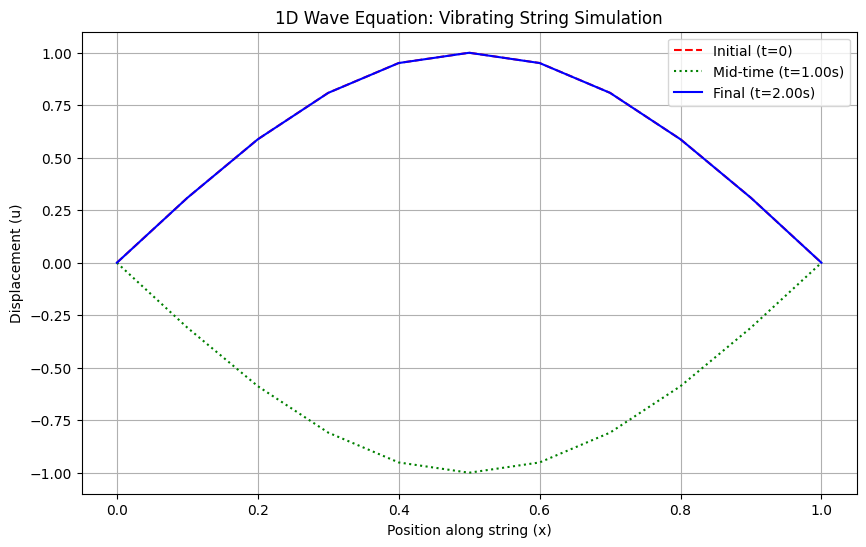

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Parameters & Discretization ---
L = 1.0             # Length of the domain (string)
c = 1.0             # Wave speed
dx = 0.1            # Spatial step size
dt = 0.05           # Time step size
T = 2.0             # Total time (enough for one full reflection)

# --- 2. Stability Check ---
C = c * dt / dx
print(f"Courant Number C = {C:.2f}")
if C > 1:
    raise ValueError("CFL condition (C <= 1) not met. Instability expected.")
else:
    print("CFL condition is satisfied.")

# --- Grid setup ---
x = np.arange(0, L + dx, dx)
nx = len(x)
nt = int(T / dt) + 1
# Create a 2D array to store the solution at all time steps
u = np.zeros((nt, nx))

# --- 3. Initial Conditions ---
# Initial displacement: u(x, 0) = sin(pi * x)
u[0, :] = np.sin(np.pi * x)

# Special formula for the first time step (n=1) assuming zero initial velocity
# u_i^1 = u_i^0 + C^2/2 * (u_{i+1}^0 - 2u_i^0 + u_{i-1}^0)
u[1, 1:-1] = u[0, 1:-1] + 0.5 * C**2 * (u[0, 2:] - 2*u[0, 1:-1] + u[0, :-2])
# Boundary conditions u(0,t)=0 and u(L,t)=0 are already handled by slicing [1:-1]

# --- 5. Time-stepping Loop ---
for n in range(1, nt - 1):
    u[n + 1, 1:-1] = (2 * u[n, 1:-1] - u[n - 1, 1:-1] +
                      C**2 * (u[n, 2:] - 2 * u[n, 1:-1] + u[n, :-2]))
# Print results
print("x\t" + "\t".join([f"u^{n}" for n in range(5)]))  # First 5 steps
for i in range(nx):
    values = "\t".join(f"{u[n, i]:.4f}" for n in range(5))
    print(f"{x[i]:.2f}\t{values}")
# Optional: plot final wave
# --- 6. Plot and Visualize ---
plt.figure(figsize=(10, 6))
plt.plot(x, u[0, :], 'r--', label='Initial (t=0)')
# Time index for t = T/2
mid_time_index = int(nt / 2)
plt.plot(x, u[mid_time_index, :], 'g:', label=f'Mid-time (t={mid_time_index*dt:.2f}s)')
plt.plot(x, u[-1, :], 'b-', label=f'Final (t={T:.2f}s)')

plt.xlabel('Position along string (x)')
plt.ylabel('Displacement (u)')
plt.title('1D Wave Equation: Vibrating String Simulation')
plt.legend()
plt.grid(True)
plt.show()

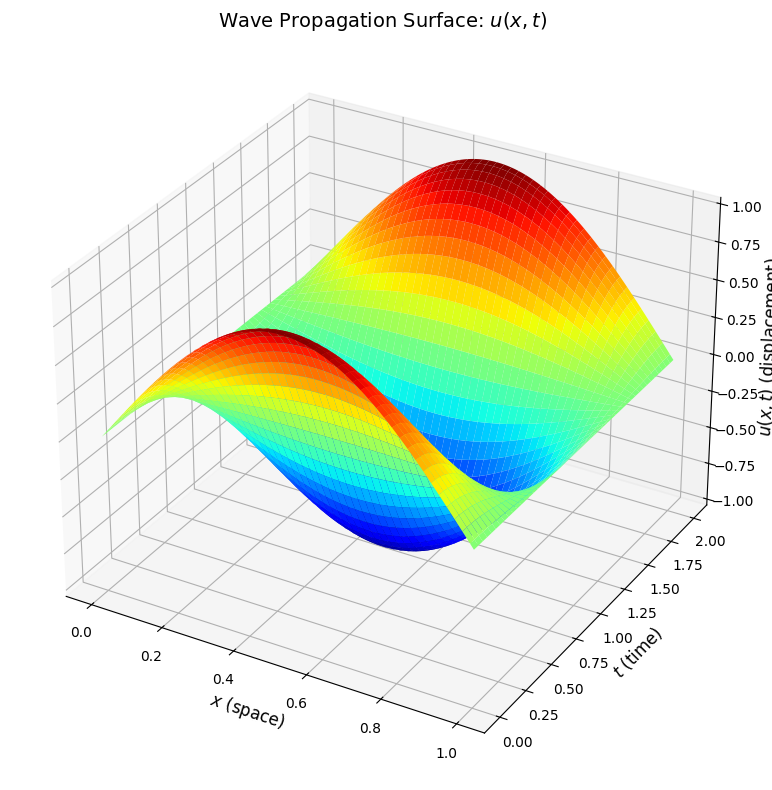

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Grid setup
L = 1.0          # Length of domain
T = 2.0          # Total time
c = 1.0          # Wave speed
nx = 100         # Number of spatial points
nt = 2006        # Number of time steps
dx = L / (nx - 1)
dt = T / nt
x = np.linspace(0, L, nx)
t = np.linspace(0, T, nt)
C = c * dt / dx  # Courant number

# Check stability
assert C <= 1, f"Stability condition violated: C = {C} > 1"

# Initialize solution matrix
u = np.zeros((nt, nx))

# Initial condition: u(x, 0)
u[0, :] = np.sin(np.pi * x)

# Apply zero initial velocity: u[1, :] from Taylor expansion
u[1, 1:-1] = u[0, 1:-1] + 0.5 * C**2 * (u[0, 2:] - 2*u[0, 1:-1] + u[0, :-2])

# Time stepping
for n in range(1, nt-1):
    u[n+1, 1:-1] = 2*(1 - C**2)*u[n, 1:-1] - u[n-1, 1:-1] + C**2 * (u[n, 2:] + u[n, :-2])
    # Boundary conditions (Dirichlet)
    u[n+1, 0] = 0
    u[n+1, -1] = 0

# Meshgrid for correct 3D plotting
X, T_mesh = np.meshgrid(x, t)

# 3D plot: u(x, t)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T_mesh, u, cmap='jet')

ax.set_xlabel('$x$ (space)', fontsize=12)
ax.set_ylabel('$t$ (time)', fontsize=12)
ax.set_zlabel('$u(x,t)$ (displacement)', fontsize=12)
ax.set_title('Wave Propagation Surface: $u(x,t)$', fontsize=14)
plt.tight_layout()
plt.show()



Result

The explicit finite difference method accurately captures the key dynamics of wave propagation and reflection, making it a powerful tool for analyzing such systems.

